<a href="https://colab.research.google.com/github/redrosesarecool/model-w-ML/blob/main/test5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126


In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 507.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB ? eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 M

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/dane_obserwacyjne-kopia.dat'

col_names = ['R','err_R','D','err_D','l','b','x','y','z','vx','vRt','err_vRt','vz','wc','delta_wc','Reference']

# delim_whitespace=True -> oddzielone spacjami lub tabami
dane_df = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=col_names)

print(dane_df.head())

# przykładowe tensory do PINN
import torch
R_tensor = torch.tensor(dane_df['R'].values, dtype=torch.float32).unsqueeze(1)
v_tensor = torch.tensor(dane_df['vRt'].values, dtype=torch.float32).unsqueeze(1)

/tmp/ipython-input-1320893702.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dane_df = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=col_names)


       R  err_R      D  err_D     l    b      x      y    z       vx      vRt  \
0  2.159  0.041  8.056  0.155  15.0  0.0  0.559 -2.085  0.0  794.078  205.522   
1  2.299  0.044  8.017  0.154  16.0  0.0  0.634 -2.210  0.0  727.687  200.578   
2  2.438  0.047  7.976  0.153  17.0  0.0  0.713 -2.332  0.0  671.798  196.415   
3  2.577  0.049  7.932  0.152  18.0  0.0  0.796 -2.451  0.0  639.551  197.632   
4  2.715  0.052  7.886  0.151  19.0  0.0  0.884 -2.567  0.0  605.491  197.129   

   err_vRt    vz      wc  delta_wc     Reference  
0      4.5  7.81  95.213     2.085  Fich89_Table  
1      4.5  7.81  87.253     1.958  Fich89_Table  
2      4.5  7.81  80.551     1.845  Fich89_Table  
3      4.5  7.81  76.685     1.746  Fich89_Table  
4      4.5  7.81  72.601     1.657  Fich89_Table  


# Wypłaszczenie danych

Wypłaszczone dane zapisano do dane_wyplaszczone.dat
Zapisano plik w: /content/dane_wyplaszczone.dat
Aktualny katalog roboczy: /content
     R_mean      v_mean      v_std
0  0.715667  284.596000  97.292414
1  1.068000  212.138000        NaN
2  1.460714  159.310714  55.025487
3  1.728455  186.597545  15.484593
4  2.057083  188.832000  42.230488
5  2.340406  200.541844  27.632671
6  2.634487  206.277410  17.156684
7  2.950000  212.392081  10.085922
8  3.239762  217.078737   9.529129
9  3.550937  221.852354   6.536144


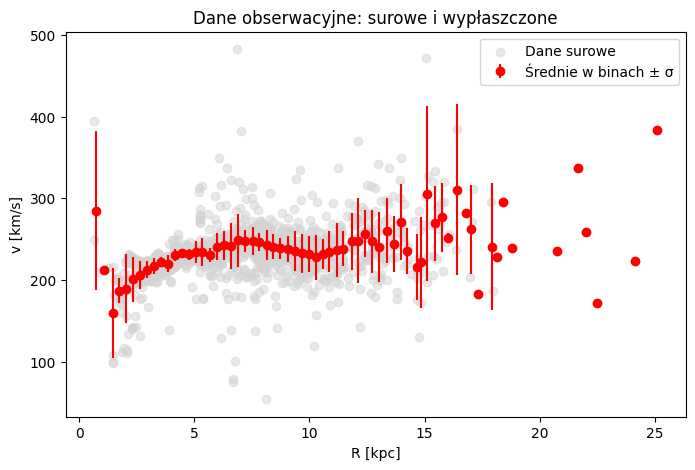

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dane

R_raw = dane_df['R'].values          # kpc
v_obs_raw = dane_df['vRt'].values    # km/s


# Wypłaszczenie danych (biny)

# Zwiększona liczba binów
n_bins = 80

# Tworzymy biny po R
bins = np.linspace(R_raw.min(), R_raw.max(), n_bins + 1)

# Tworzymy DataFrame dla wygody
df = pd.DataFrame({'R': R_raw, 'v': v_obs_raw})
df['bin'] = np.digitize(df['R'], bins)

# Średnia i odchylenie w każdym binie
v_mean = df.groupby('bin')['v'].mean().values
v_std = df.groupby('bin')['v'].std().values
R_mean = df.groupby('bin')['R'].mean().values


# Zapis do nowego pliku

wyp_plik = 'dane_wyplaszczone.dat'
wyp_df = pd.DataFrame({'R_mean': R_mean, 'v_mean': v_mean, 'v_std': v_std})
wyp_df.to_csv(wyp_plik, sep='\t', index=False)
print(f"Wypłaszczone dane zapisano do {wyp_plik}")

import os
print("Zapisano plik w:", os.path.abspath(wyp_plik))
print("Aktualny katalog roboczy:", os.getcwd())

# Wyświetlenie fragmentu danych

print(wyp_df.head(10))  # pierwsze 10 wierszy

# Wykres surowe dane + wypłaszczone

plt.figure(figsize=(8,5))
plt.scatter(R_raw, v_obs_raw, color='lightgray', alpha=0.5, label='Dane surowe')
plt.errorbar(R_mean, v_mean, yerr=v_std, fmt='o', color='red', label='Średnie w binach ± σ')
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Dane obserwacyjne: surowe i wypłaszczone')
plt.legend()
plt.show()

In [ ]:
import torch

def besselj1_torch(x):
    """
    Aproksymacja Bessel J1 działająca w 100% w torch
    (autograd-friendly, bez numpy).
    """
    x = torch.as_tensor(x, dtype=torch.float32)

    # małe argumenty -> rozwinięcie szeregu Taylora
    small = x.abs() < 1e-2
    large = ~small

    result = torch.zeros_like(x)

    # J1(x) ≈ x/2 - x³/16 + x⁵/384
    xx = x[small]
    result[small] = xx/2 - xx**3/16 + xx**5/384

    # duże argumenty -> asymptotyka
    # J1(x) ≈ sqrt(2/(πx)) * cos(x - 3π/4)
    xl = x[large]
    result[large] = torch.sqrt(2/(torch.pi*xl)) * torch.cos(xl - 3*torch.pi/4)

    return result

# przykład - nie ruszać


Epoch 0, Loss: 1247761408.000000
Epoch 5000, Loss: 14690231.000000
Epoch 10000, Loss: 1268441.875000
Epoch 15000, Loss: 86942.742188
Epoch 20000, Loss: 8620.895508
Epoch 25000, Loss: 858.902649
Epoch 30000, Loss: 43.806774
Epoch 35000, Loss: 3.865986
Epoch 40000, Loss: 0.342540
Epoch 45000, Loss: 0.064570
Epoch 50000, Loss: 0.031922
Epoch 55000, Loss: 0.015730
Epoch 60000, Loss: 0.008604
Epoch 65000, Loss: 0.005477
Epoch 70000, Loss: 0.004102
Epoch 75000, Loss: 0.003497
Epoch 80000, Loss: 0.003232
Epoch 85000, Loss: 0.003115
Epoch 90000, Loss: 0.003075


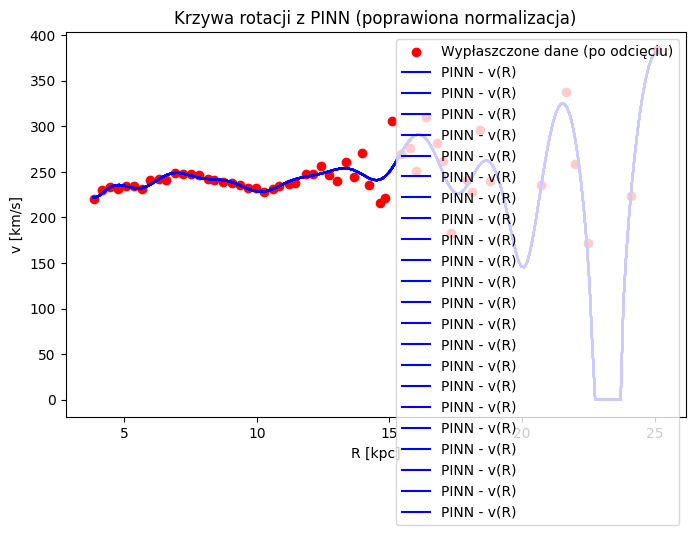

In [ ]:
import numpy as np
import pandas as pd
import torch
from scipy.special import jn_zeros, j1
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Wczytanie wypłaszczonych danych
# -----------------------------
wyp_df = pd.read_csv('dane_wyplaszczone.dat', sep='\t')

# Odcięcie pierwszych 10 punktów
wyp_df_cut = wyp_df.iloc[10:].reset_index(drop=True)
R_mean = wyp_df_cut['R_mean'].values
v_mean = wyp_df_cut['v_mean'].values

# -----------------------------
# 2️⃣ Normalizacja danych
# -----------------------------
R_scale = R_mean.max()       # np. 15 kpc
v_scale = v_mean.max()       # np. 250 km/s

R_train_scaled = torch.tensor(R_mean / R_scale, dtype=torch.float32).unsqueeze(1)
v_train_scaled = torch.tensor(v_mean / v_scale, dtype=torch.float32).unsqueeze(1)

# -----------------------------
# 3️⃣ Parametry PINN
# -----------------------------
N = 22  # liczba składników sumy Bessela
z0 = 0.0  # płaszczyzna z=0

# pierwiastki J0
lambda_n_raw = jn_zeros(0, N)
lambda_n = torch.tensor(lambda_n_raw, dtype=torch.float32).unsqueeze(0)

# Parametry A_n (log-transform, większa inicjalizacja)
logA = torch.nn.Parameter(torch.randn(N, 1) * 6.0)  # większa inicjalizacja
optimizer = torch.optim.Adam([logA], lr=1e-3)

# -----------------------------
# 4️⃣ Funkcja predykcji v^2
# -----------------------------
def v2_pred(R, logA, lambda_n, z=0.0):
    A = torch.exp(logA)  # zawsze >0
    R_mat = R.repeat(1, N)
    lambda_mat = lambda_n.repeat(R.shape[0], 1)

    J1_val = torch.tensor(j1(lambda_mat.detach().numpy() * R_mat.detach().numpy()), dtype=torch.float32)

    v2 = R_mat * torch.matmul(J1_val * lambda_mat, A) * torch.exp(-lambda_mat * z)
    return v2

# -----------------------------
# 5️⃣ Training loop
# -----------------------------
epochs = 95000
for epoch in range(epochs):
    optimizer.zero_grad()
    v2 = v2_pred(R_train_scaled, logA, lambda_n, z=z0)

    # Loss trenowany na znormalizowany v²
    loss = ((v2 - v_train_scaled**2)**2).mean()
    loss.backward()
    optimizer.step()

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# -----------------------------
# 6️⃣ Wykres krzywej rotacji (odwrócenie normalizacji)
# -----------------------------
R_test_scaled = torch.linspace(R_train_scaled.min(), R_train_scaled.max(), 200).unsqueeze(1)
v_test_scaled = torch.sqrt(torch.relu(v2_pred(R_test_scaled, logA, lambda_n, z=z0)))

R_test_phys = R_test_scaled * R_scale
v_test_phys = v_test_scaled * v_scale

plt.figure(figsize=(8,5))
plt.scatter(R_mean, v_mean, color='red', label='Wypłaszczone dane (po odcięciu)')
plt.plot(R_test_phys.detach().numpy(), v_test_phys.detach().numpy(), color='blue', label='PINN - v(R)')
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Krzywa rotacji z PINN (poprawiona normalizacja)')
plt.legend()
plt.show()


Epoch 0, Loss: 176743743488.000000
Epoch 5000, Loss: 2928188160.000000
Epoch 10000, Loss: 256787408.000000
Epoch 15000, Loss: 19955178.000000
Epoch 20000, Loss: 1071287.875000
Epoch 25000, Loss: 173341.546875
Epoch 30000, Loss: 6989.298340
Epoch 35000, Loss: 552.333496
Epoch 40000, Loss: 79.693520
Epoch 45000, Loss: 14.078437
Epoch 50000, Loss: 6.700634
Epoch 55000, Loss: 2.971971
Epoch 60000, Loss: 1.305437
Epoch 65000, Loss: 0.574732
Epoch 70000, Loss: 0.253947
Epoch 75000, Loss: 0.113257
Epoch 80000, Loss: 0.051460
Epoch 85000, Loss: 0.024301
Epoch 90000, Loss: 0.012369


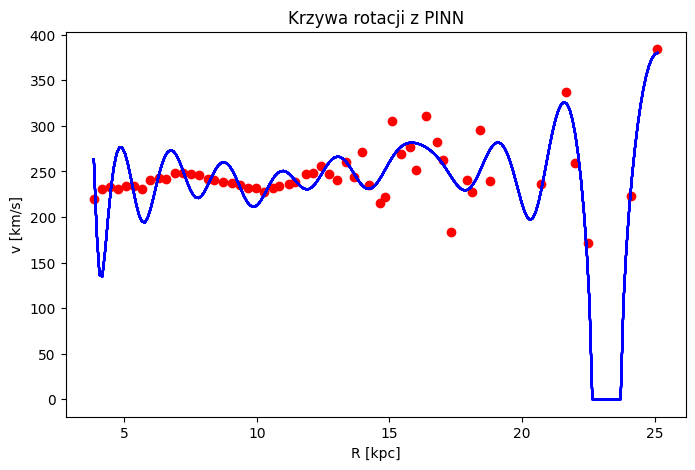

In [ ]:
import numpy as np
import pandas as pd
import torch
from scipy.special import jn_zeros, j1
import matplotlib.pyplot as plt


# Wczytanie wypłaszczonych danych

wyp_df = pd.read_csv('dane_wyplaszczone.dat', sep='\t')

# Odcięcie pierwszych 10 punktów
wyp_df_cut = wyp_df.iloc[10:].reset_index(drop=True)
R_mean = wyp_df_cut['R_mean'].values
v_mean = wyp_df_cut['v_mean'].values


# Normalizacja danych

R_scale = R_mean.max()       # np. 15 kpc
v_scale = v_mean.max()       # np. 250 km/s

R_train_scaled = torch.tensor(R_mean / R_scale, dtype=torch.float32).unsqueeze(1)
v_train_scaled = torch.tensor(v_mean / v_scale, dtype=torch.float32).unsqueeze(1)


# Parametry PINN

N = 22  # liczba składników sumy Bessela
z0 = 0.0  # płaszczyzna z=0

# pierwiastki J0
lambda_n_raw = jn_zeros(0, N)
lambda_n = torch.tensor(lambda_n_raw, dtype=torch.float32).unsqueeze(0)

# Parametry A_n (log-transform, większa inicjalizacja)
logA = torch.nn.Parameter(torch.randn(N, 1) * 6.0)  # większa inicjalizacja
optimizer = torch.optim.Adam([logA], lr=1e-3)


# Funkcja predykcji v^2

def v2_pred(R, logA, lambda_n, z=0.0):
    A = torch.exp(logA)  # zawsze >0
    R_mat = R.repeat(1, N)
    lambda_mat = lambda_n.repeat(R.shape[0], 1)

    J1_val = torch.tensor(j1(lambda_mat.detach().numpy() * R_mat.detach().numpy()), dtype=torch.float32)

    v2 = R_mat * torch.matmul(J1_val * lambda_mat, A) * torch.exp(-lambda_mat * z)
    return v2


# Training loop

epochs = 95000
for epoch in range(epochs):
    optimizer.zero_grad()
    v2 = v2_pred(R_train_scaled, logA, lambda_n, z=z0)

    # Loss trenowany na znormalizowany v²
    loss = ((v2 - v_train_scaled**2)**2).mean()
    loss.backward()
    optimizer.step()

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Wykres krzywej rotacji (odwrócenie normalizacji)

R_test_scaled = torch.linspace(R_train_scaled.min(), R_train_scaled.max(), 200).unsqueeze(1)
v_test_scaled = torch.sqrt(torch.relu(v2_pred(R_test_scaled, logA, lambda_n, z=z0)))

R_test_phys = R_test_scaled * R_scale
v_test_phys = v_test_scaled * v_scale

plt.figure(figsize=(8,5))
plt.scatter(R_mean, v_mean, color='red', label='Wypłaszczone dane (po odcięciu)')
plt.plot(R_test_phys.detach().numpy(), v_test_phys.detach().numpy(), color='blue', label='PINN - v(R)')
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Krzywa rotacji z PINN')
plt.show()


# Fitowanie krzywej rotacji za pomocą PINN





# Wypłaszczenie dla N=80

PINN wczytuje plik z: /content/dane_wyplaszczone.dat
Aktualny katalog roboczy (PINN): /content
     R_mean      v_mean      v_std
0  0.715667  284.596000  97.292414
1  1.068000  212.138000        NaN
2  1.460714  159.310714  55.025487
3  1.728455  186.597545  15.484593
4  2.057083  188.832000  42.230488
0.1536816507577896 1.0
Epoch 0, Loss: 7.718253
Epoch 5000, Loss: 0.106075
Epoch 10000, Loss: 0.008877
Epoch 15000, Loss: 0.004446
Epoch 20000, Loss: 0.003697
Epoch 25000, Loss: 0.003326
Epoch 30000, Loss: 0.003157


<Figure size 640x480 with 0 Axes>

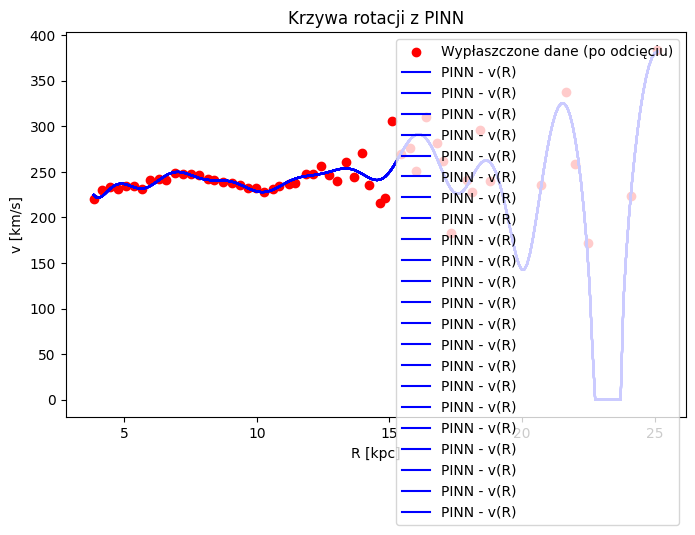

In [ ]:
import numpy as np
import pandas as pd
import torch
from scipy.special import jn_zeros, j1
import matplotlib.pyplot as plt
import random
import os


# Deterministyczność

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Wczytanie danych

import os
print("PINN wczytuje plik z:", os.path.abspath("dane_wyplaszczone.dat"))
print("Aktualny katalog roboczy (PINN):", os.getcwd())

wyp_df = pd.read_csv('dane_wyplaszczone.dat', sep='\t')
wyp_df_cut = wyp_df.iloc[10:].reset_index(drop=True)
R_mean = wyp_df_cut['R_mean'].values
v_mean = wyp_df_cut['v_mean'].values

print(wyp_df.head())


# Normalizacja

R_scale = R_mean.max()
v_scale = v_mean.max()

R_train_scaled = torch.tensor(R_mean / R_scale, dtype=torch.float32).unsqueeze(1)
v_train_scaled = torch.tensor(v_mean / v_scale, dtype=torch.float32).unsqueeze(1)

print(R_train_scaled.min().item(), R_train_scaled.max().item())

# Parametry PINN

N = 22
z0 = 0.0
lambda_n_raw = jn_zeros(0, N)
lambda_n = torch.tensor(lambda_n_raw, dtype=torch.float32).unsqueeze(0)

# Parametry A_n
logA = torch.nn.Parameter(torch.zeros(N, 1))
optimizer = torch.optim.Adam([logA], lr=1e-3)

# Funkcja predykcji v^2

def v2_pred(R, logA, lambda_n, z=0.0):
    A = torch.exp(logA)  # zawsze >0
    R_mat = R.repeat(1, N)
    lambda_mat = lambda_n.repeat(R.shape[0], 1)

    # stabilna funkcja J1 z scipy
    x = lambda_mat * R_mat
    J1_val = torch.from_numpy(j1(x.cpu().numpy())).float().to(x.device)

    v2 = R_mat * torch.matmul(J1_val * lambda_mat, A) * torch.exp(-lambda_mat * z)
    return v2


# Training loop

epochs = 35000
for epoch in range(epochs):
    optimizer.zero_grad()
    v2 = v2_pred(R_train_scaled, logA, lambda_n, z=z0)

    loss = ((v2 - v_train_scaled**2)**2 + 1e-12).mean()  # epsilon dla stabilności
    loss.backward()
    optimizer.step()

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


# Wykres krzywej rotacji

R_test_scaled = torch.linspace(R_train_scaled.min(), R_train_scaled.max(), 200).unsqueeze(1)
v_test_scaled = torch.sqrt(torch.relu(v2_pred(R_test_scaled, logA, lambda_n, z=z0)))

R_test_phys = R_test_scaled * R_scale
v_test_phys = v_test_scaled * v_scale

plt.clf()
plt.figure(figsize=(8,5))
plt.scatter(R_mean, v_mean, color='red', label='Wypłaszczone dane (po odcięciu)')
plt.plot(R_test_phys.detach().numpy(), v_test_phys.detach().numpy(), color='blue', label='PINN - v(R)')
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Krzywa rotacji z PINN')
plt.legend()
plt.show()


Epoch 0, Loss: 6.098667
Epoch 5000, Loss: 0.091862
Epoch 10000, Loss: 0.010792
Epoch 15000, Loss: 0.007046
Epoch 20000, Loss: 0.005786
Epoch 25000, Loss: 0.005095
Epoch 30000, Loss: 0.004734
Epoch 35000, Loss: 0.004568
Epoch 40000, Loss: 0.004530


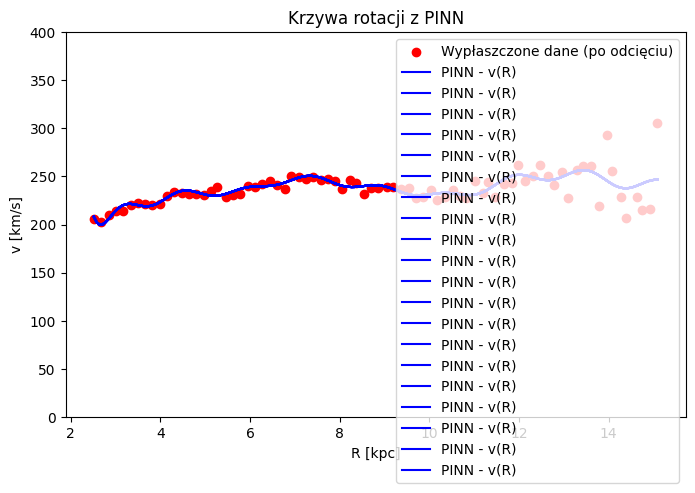

In [ ]:
import numpy as np
import pandas as pd
import torch
from scipy.special import jn_zeros, j1
import matplotlib.pyplot as plt
import random
import os


# Deterministyczność

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Wczytanie danych

wyp_df = pd.read_csv('dane_wyplaszczone.dat', sep='\t')
wyp_df_cut = wyp_df.iloc[10:-20].reset_index(drop=True)
R_mean = wyp_df_cut['R_mean'].values
v_mean = wyp_df_cut['v_mean'].values


# Normalizacja

R_scale = R_mean.max()
v_scale = v_mean.max()

R_train_scaled = torch.tensor(R_mean / R_scale, dtype=torch.float32).unsqueeze(1)
v_train_scaled = torch.tensor(v_mean / v_scale, dtype=torch.float32).unsqueeze(1)


# Parametry PINN

N = 20
z0 = 0.0
lambda_n_raw = jn_zeros(0, N)
lambda_n = torch.tensor(lambda_n_raw, dtype=torch.float32).unsqueeze(0)

# Parametry A_n
logA = torch.nn.Parameter(torch.zeros(N, 1))  # start A ~ 1
optimizer = torch.optim.Adam([logA], lr=1e-3)


# Funkcja predykcji v^2

def v2_pred(R, logA, lambda_n, z=0.0):
    A = torch.exp(logA)  # zawsze >0
    R_mat = R.repeat(1, N)
    lambda_mat = lambda_n.repeat(R.shape[0], 1)

    # stabilna funkcja J1 z scipy
    x = (lambda_mat * R_mat).detach().numpy()
    J1_val = torch.tensor(j1(x), dtype=torch.float32)

    v2 = R_mat * torch.matmul(J1_val * lambda_mat, A) * torch.exp(-lambda_mat * z)
    return v2


# Training loop

epochs = 45000
for epoch in range(epochs):
    optimizer.zero_grad()
    v2 = v2_pred(R_train_scaled, logA, lambda_n, z=z0)

    loss = ((v2 - v_train_scaled**2)**2 + 1e-12).mean()  # epsilon dla stabilności
    loss.backward()
    optimizer.step()

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


# Wykres krzywej rotacji

R_test_scaled = torch.linspace(R_train_scaled.min(), R_train_scaled.max(), 200).unsqueeze(1)
v_test_scaled = torch.sqrt(torch.relu(v2_pred(R_test_scaled, logA, lambda_n, z=z0)))

R_test_phys = R_test_scaled * R_scale
v_test_phys = v_test_scaled * v_scale

plt.figure(figsize=(8,5))
plt.scatter(R_mean, v_mean, color='red', label='Wypłaszczone dane (po odcięciu)')
plt.plot(R_test_phys.detach().numpy(), v_test_phys.detach().numpy(), color='blue', label='PINN - v(R)')
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Krzywa rotacji z PINN')
plt.ylim(0,400)
plt.legend()
plt.show()


# Potencjał grawitacyjny

tensor([5.0704e-01, 2.1781e-01, 1.0989e-01, 8.5531e-02, 6.4547e-02, 3.4011e-02,
        3.5721e-02, 2.4865e-02, 2.9467e-02, 1.6522e-02, 3.2736e-02, 2.5872e-06,
        3.1893e-02, 1.0263e-03, 2.9146e-02, 2.2098e-06, 2.4312e-02, 4.6375e-03,
        7.0089e-03, 1.0426e-02, 6.6609e-04, 3.5899e-03])


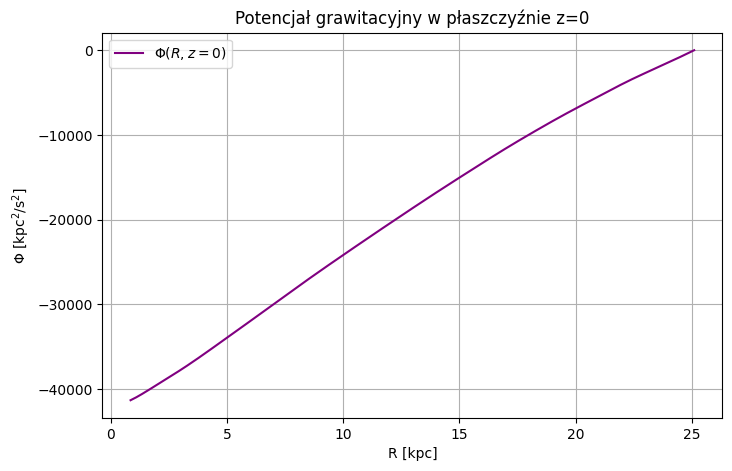

In [ ]:
import numpy as np
import torch
from scipy.special import j0
import matplotlib.pyplot as plt

# Wyciągnięcie wartości A_n i lambda_n
A_vals = torch.exp(logA).detach().squeeze()   # [N]
lambda_vals = lambda_n.squeeze(0)            # [N]

print(A_vals)

# Funkcja potencjału w jednostkach fizycznych [kpc^2/s^2]
def phi_R(R_phys, z=0.0):
    R_scaled = torch.tensor(R_phys / R_scale, dtype=torch.float32)

    # broadcast do [num_R, N]
    R_mat = R_scaled.unsqueeze(1)            # [num_R,1]
    lambda_mat = lambda_vals.unsqueeze(0)    # [1,N]

    # J0(lambda_n * R)
    x = (lambda_mat * R_mat).detach().numpy()
    J0_vals = torch.tensor(j0(x), dtype=torch.float32)

    # Φ(R,z) = sum_i (A_i / λ_i) * J0(λ_i R) * exp(-λ_i z)
    Phi_model = torch.sum((-A_vals.unsqueeze(0) / lambda_mat) *
                          J0_vals * torch.exp(-lambda_mat * abs(z)), dim=1)

    # przeskalowanie na jednostki fizyczne [kpc^2/s^2]
    return Phi_model * v_scale**2

# Siatka R i wykres
R_grid = np.linspace(R_mean.min(), R_mean.max(), 200)
Phi_vals = phi_R(R_grid, z=0.0).detach().numpy()

plt.figure(figsize=(8,5))
plt.plot(R_grid, Phi_vals, color='purple', label=r'$\Phi(R, z=0)$')
plt.xlabel('R [kpc]')
plt.ylabel(r'$\Phi$ [kpc$^2$/s$^2$]')
plt.title('Potencjał grawitacyjny w płaszczyźnie z=0')
plt.legend()
plt.grid(True)
plt.show()


# Wypłaszczenie dla N=150


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/dane_obserwacyjne-kopia.dat'

col_names = ['R','err_R','D','err_D','l','b','x','y','z','vx','vRt','err_vRt','vz','wc','delta_wc','Reference']

# delim_whitespace=True -> oddzielone spacjami lub tabami
dane_df = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=col_names)

print(dane_df.head())

# przykładowe tensory do PINN
import torch
R_tensor = torch.tensor(dane_df['R'].values, dtype=torch.float32).unsqueeze(1)
v_tensor = torch.tensor(dane_df['vRt'].values, dtype=torch.float32).unsqueeze(1)

       R  err_R      D  err_D     l    b      x      y    z       vx      vRt  \
0  2.159  0.041  8.056  0.155  15.0  0.0  0.559 -2.085  0.0  794.078  205.522   
1  2.299  0.044  8.017  0.154  16.0  0.0  0.634 -2.210  0.0  727.687  200.578   
2  2.438  0.047  7.976  0.153  17.0  0.0  0.713 -2.332  0.0  671.798  196.415   
3  2.577  0.049  7.932  0.152  18.0  0.0  0.796 -2.451  0.0  639.551  197.632   
4  2.715  0.052  7.886  0.151  19.0  0.0  0.884 -2.567  0.0  605.491  197.129   

   err_vRt    vz      wc  delta_wc     Reference  
0      4.5  7.81  95.213     2.085  Fich89_Table  
1      4.5  7.81  87.253     1.958  Fich89_Table  
2      4.5  7.81  80.551     1.845  Fich89_Table  
3      4.5  7.81  76.685     1.746  Fich89_Table  
4      4.5  7.81  72.601     1.657  Fich89_Table  


/tmp/ipython-input-1320893702.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dane_df = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=col_names)


Wypłaszczone dane zapisano do dane_wyplaszczone.dat
Zapisano plik w: /content/dane_wyplaszczone.dat
Aktualny katalog roboczy: /content
     R_mean      v_mean       v_std
0  0.648000  321.794500  103.098290
1  0.851000  210.199000         NaN
2  1.068000  212.138000         NaN
3  1.259000  215.073000         NaN
4  1.508143  157.136429   52.706699
5  1.691333  192.657833   14.017449
6  1.876000  170.060900   32.631006
7  2.070400  188.874500   46.792986
8  2.181733  207.533333   24.643329
9  2.346056  199.177444   29.838157


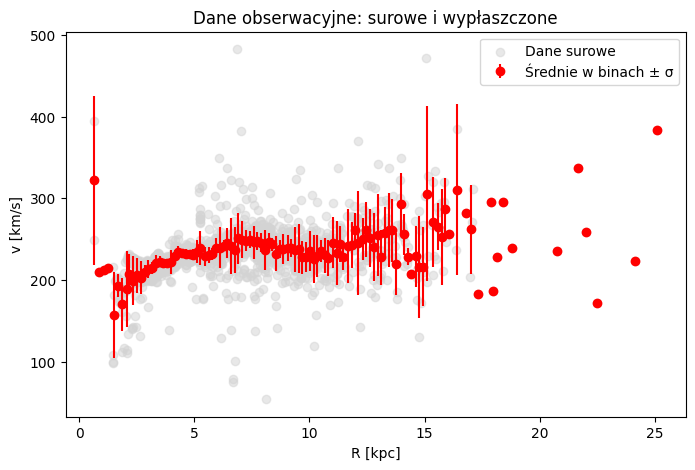

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dane

R_raw = dane_df['R'].values          # kpc
v_obs_raw = dane_df['vRt'].values    # km/s


# Wypłaszczenie danych (biny)

# Zwiększona liczba binów
n_bins = 150

# Tworzymy biny po R
bins = np.linspace(R_raw.min(), R_raw.max(), n_bins + 1)

# Tworzymy DataFrame dla wygody
df = pd.DataFrame({'R': R_raw, 'v': v_obs_raw})
df['bin'] = np.digitize(df['R'], bins)

# Średnia i odchylenie w każdym binie
v_mean = df.groupby('bin')['v'].mean().values
v_std = df.groupby('bin')['v'].std().values
R_mean = df.groupby('bin')['R'].mean().values


# Zapis do nowego pliku

wyp_plik = 'dane_wyplaszczone.dat'
wyp_df = pd.DataFrame({'R_mean': R_mean, 'v_mean': v_mean, 'v_std': v_std})
wyp_df.to_csv(wyp_plik, sep='\t', index=False)
print(f"Wypłaszczone dane zapisano do {wyp_plik}")

import os
print("Zapisano plik w:", os.path.abspath(wyp_plik))
print("Aktualny katalog roboczy:", os.getcwd())

# Wyświetlenie fragmentu danych

print(wyp_df.head(10))  # pierwsze 10 wierszy

# Wykres surowe dane + wypłaszczone

plt.figure(figsize=(8,5))
plt.scatter(R_raw, v_obs_raw, color='lightgray', alpha=0.5, label='Dane surowe')
plt.errorbar(R_mean, v_mean, yerr=v_std, fmt='o', color='red', label='Średnie w binach ± σ')
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Dane obserwacyjne: surowe i wypłaszczone')
plt.legend()
plt.show()

In [ ]:
import torch

def besselj1_torch(x):
    """
    Aproksymacja Bessel J1 działająca w 100% w torch
    (autograd-friendly, bez numpy).
    """
    x = torch.as_tensor(x, dtype=torch.float32)

    # małe argumenty -> rozwinięcie szeregu Taylora
    small = x.abs() < 1e-2
    large = ~small

    result = torch.zeros_like(x)

    # J1(x) ≈ x/2 - x³/16 + x⁵/384
    xx = x[small]
    result[small] = xx/2 - xx**3/16 + xx**5/384

    # duże argumenty -> asymptotyka
    # J1(x) ≈ sqrt(2/(πx)) * cos(x - 3π/4)
    xl = x[large]
    result[large] = torch.sqrt(2/(torch.pi*xl)) * torch.cos(xl - 3*torch.pi/4)

    return result

PINN wczytuje plik z: /content/dane_wyplaszczone.dat
Aktualny katalog roboczy (PINN): /content
     R_mean      v_mean       v_std
0  0.648000  321.794500  103.098290
1  0.851000  210.199000         NaN
2  1.068000  212.138000         NaN
3  1.259000  215.073000         NaN
4  1.508143  157.136429   52.706699
0.025815704837441444 1.0
Epoch 0, Loss: 33.945251
Epoch 5000, Loss: 0.549683
Epoch 10000, Loss: 0.043413
Epoch 15000, Loss: 0.005583
Epoch 20000, Loss: 0.002727
Epoch 25000, Loss: 0.002513
Epoch 30000, Loss: 0.002494
Epoch 35000, Loss: 0.002491
Epoch 40000, Loss: 0.002491


<Figure size 640x480 with 0 Axes>

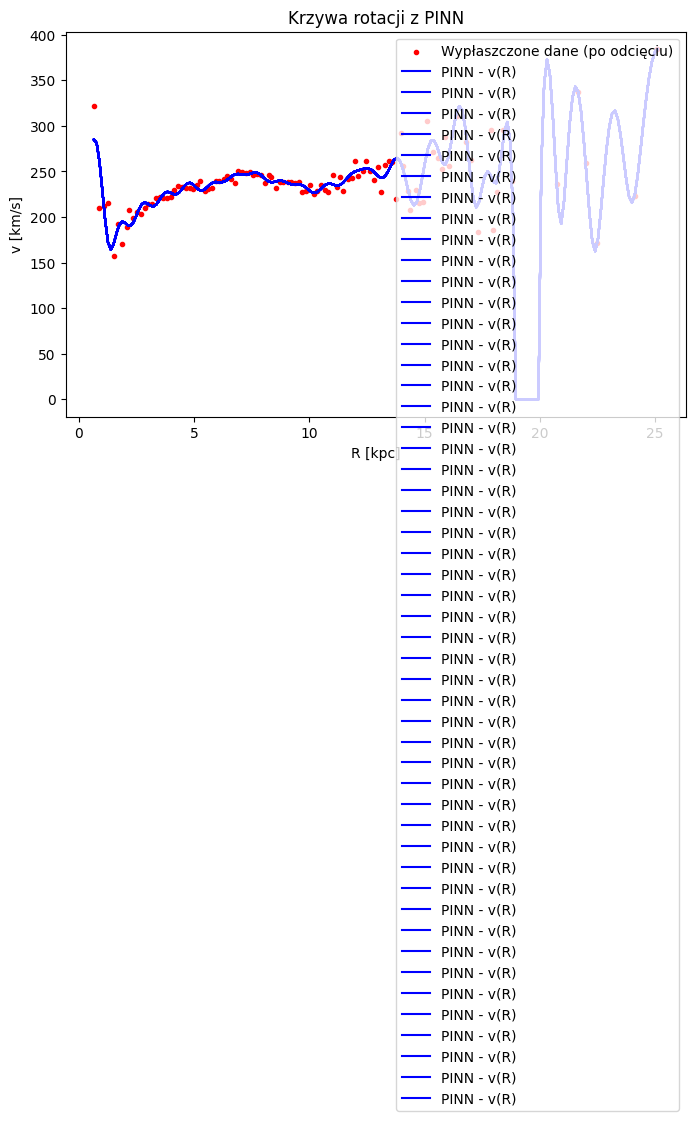

In [ ]:
import numpy as np
import pandas as pd
import torch
from scipy.special import jn_zeros, j1
import matplotlib.pyplot as plt
import random
import os


# Deterministyczność

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Wczytanie danych

import os
print("PINN wczytuje plik z:", os.path.abspath("dane_wyplaszczone.dat"))
print("Aktualny katalog roboczy (PINN):", os.getcwd())

wyp_df = pd.read_csv('dane_wyplaszczone.dat', sep='\t')
wyp_df_cut = wyp_df[~wyp_df['v_mean'].isna()].reset_index(drop=True)
R_mean = wyp_df_cut['R_mean'].values
v_mean = wyp_df_cut['v_mean'].values

print(wyp_df.head())


# Normalizacja

R_scale = R_mean.max()
v_scale = v_mean.max()

R_train_scaled = torch.tensor(R_mean / R_scale, dtype=torch.float32).unsqueeze(1)
v_train_scaled = torch.tensor(v_mean / v_scale, dtype=torch.float32).unsqueeze(1)

print(R_train_scaled.min().item(), R_train_scaled.max().item())

# Parametry PINN

N = 50
z0 = 0.0
lambda_n_raw = jn_zeros(0, N)
lambda_n = torch.tensor(lambda_n_raw, dtype=torch.float32).unsqueeze(0)

# Parametry A_n
logA = torch.nn.Parameter(torch.zeros(N, 1))
optimizer = torch.optim.Adam([logA], lr=1e-3)

# Funkcja predykcji v^2

def v2_pred(R, logA, lambda_n, z=0.0):
    A = torch.exp(logA)  # zawsze >0
    R_mat = R.repeat(1, N)
    lambda_mat = lambda_n.repeat(R.shape[0], 1)

    # stabilna funkcja J1 z scipy
    x = lambda_mat * R_mat
    J1_val = torch.from_numpy(j1(x.cpu().numpy())).float().to(x.device)

    v2 = R_mat * torch.matmul(J1_val * lambda_mat, A) * torch.exp(-lambda_mat * z)
    return v2


# Training loop

epochs = 45000
for epoch in range(epochs):
    optimizer.zero_grad()
    v2 = v2_pred(R_train_scaled, logA, lambda_n, z=z0)

    loss = ((v2 - v_train_scaled**2)**2 + 1e-12).mean()  # epsilon dla stabilności
    loss.backward()
    optimizer.step()

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


# Wykres krzywej rotacji

R_test_scaled = torch.linspace(R_train_scaled.min(), R_train_scaled.max(), 200).unsqueeze(1)
v_test_scaled = torch.sqrt(torch.relu(v2_pred(R_test_scaled, logA, lambda_n, z=z0)))

R_test_phys = R_test_scaled * R_scale
v_test_phys = v_test_scaled * v_scale

plt.clf()
plt.figure(figsize=(8,5))
plt.scatter(R_mean, v_mean, color='red', s=9, label='Wypłaszczone dane (po odcięciu)')
plt.plot(R_test_phys.detach().numpy(), v_test_phys.detach().numpy(), color='blue', label='PINN - v(R)')
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Krzywa rotacji z PINN')
plt.legend()
plt.show()


# Połączenie fitowania z potencjałem

PINN wczytuje plik z: /content/dane_wyplaszczone.dat
Aktualny katalog roboczy (PINN): /content
     R_mean      v_mean       v_std
0  0.648000  321.794500  103.098290
1  0.851000  210.199000         NaN
2  1.068000  212.138000         NaN
3  1.259000  215.073000         NaN
4  1.508143  157.136429   52.706699
Epoch 0, Loss: 33.945251
Epoch 5000, Loss: 0.549683
Epoch 10000, Loss: 0.043413
Epoch 15000, Loss: 0.005583
Epoch 20000, Loss: 0.002727
Epoch 25000, Loss: 0.002513
Epoch 30000, Loss: 0.002494
Epoch 35000, Loss: 0.002491
Epoch 40000, Loss: 0.002491


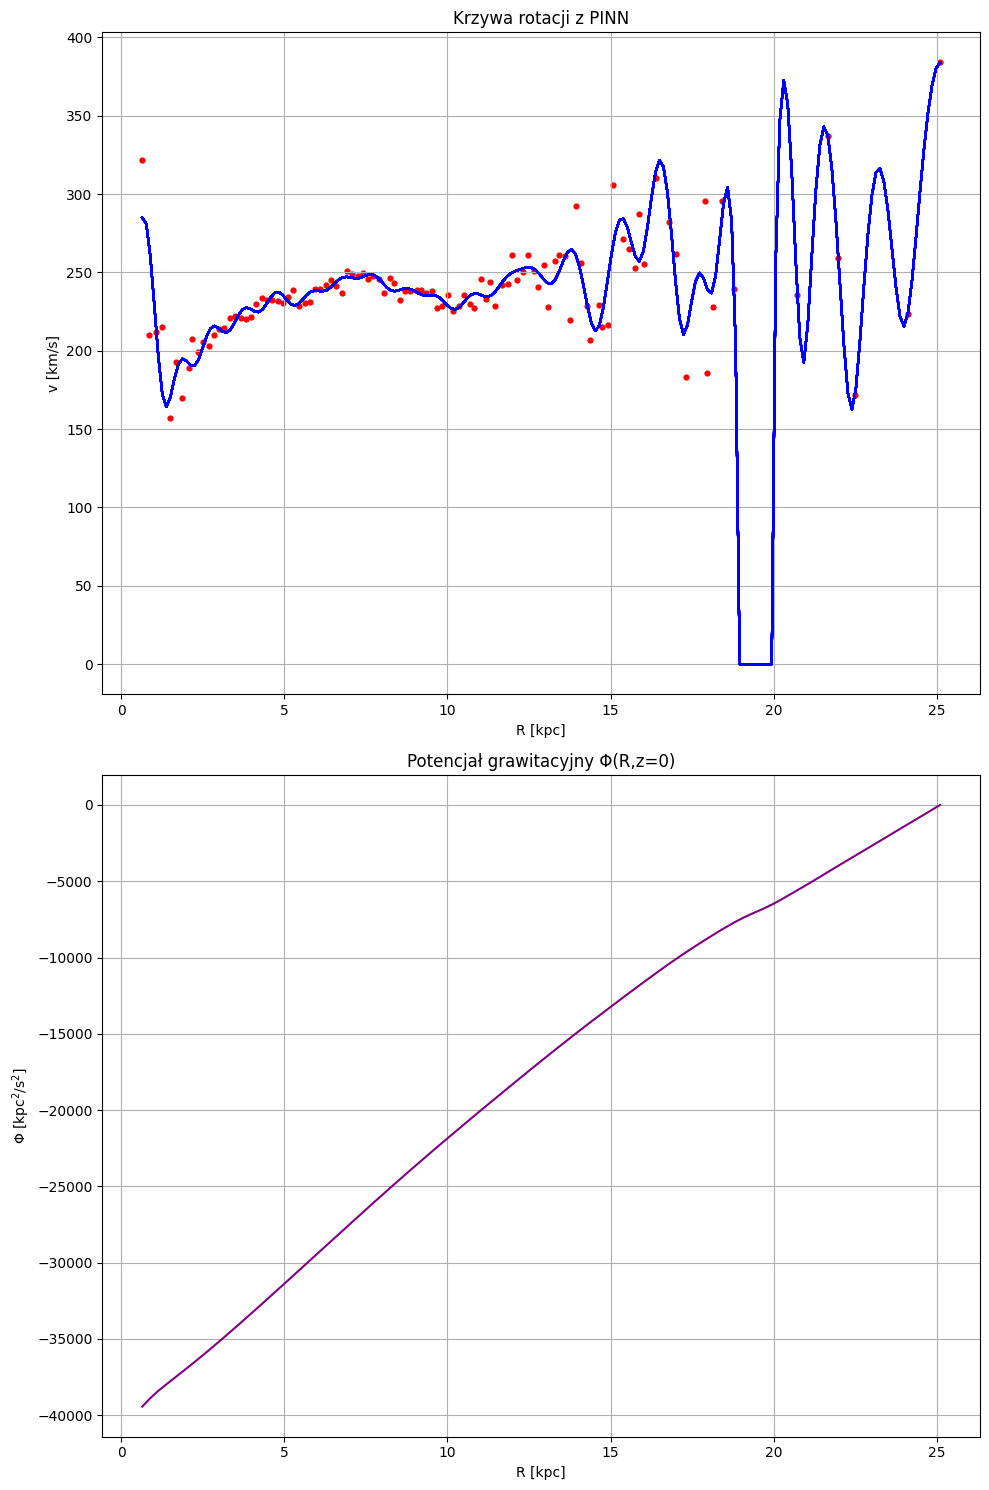

In [ ]:
import numpy as np
import pandas as pd
import torch
from scipy.special import jn_zeros, j1, j0
import matplotlib.pyplot as plt
import random
import os

# ================================================================
# 1. Deterministyczność
# ================================================================

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ================================================================
# 2. Wczytanie danych
# ================================================================

print("PINN wczytuje plik z:", os.path.abspath("dane_wyplaszczone.dat"))
print("Aktualny katalog roboczy (PINN):", os.getcwd())

wyp_df = pd.read_csv('dane_wyplaszczone.dat', sep='\t')
wyp_df_cut = wyp_df[~wyp_df['v_mean'].isna()].reset_index(drop=True)
R_mean = wyp_df_cut['R_mean'].values
v_mean = wyp_df_cut['v_mean'].values

print(wyp_df.head())

# ================================================================
# 3. Normalizacja
# ================================================================

R_scale = R_mean.max()
v_scale = v_mean.max()

R_train_scaled = torch.tensor(R_mean / R_scale, dtype=torch.float32).unsqueeze(1)
v_train_scaled = torch.tensor(v_mean / v_scale, dtype=torch.float32).unsqueeze(1)

# ================================================================
# 4. Parametry PINN
# ================================================================

N = 50              # liczba modów Bessela
z0 = 0.0
lambda_n_raw = jn_zeros(0, N)
lambda_n = torch.tensor(lambda_n_raw, dtype=torch.float32).unsqueeze(0)

logA = torch.nn.Parameter(torch.zeros(N, 1))
optimizer = torch.optim.Adam([logA], lr=1e-3)

# ================================================================
# 5. Funkcja predykcji v^2(R)
# ================================================================

def v2_pred(R, logA, lambda_n, z=0.0):
    A = torch.exp(logA)
    R_mat = R.repeat(1, N)
    lambda_mat = lambda_n.repeat(R.shape[0], 1)

    x = lambda_mat * R_mat
    J1_val = torch.from_numpy(j1(x.cpu().numpy())).float().to(x.device)

    return R_mat * torch.matmul(J1_val * lambda_mat, A) * torch.exp(-lambda_mat * z)

# ================================================================
# 6. Trening PINN
# ================================================================

epochs = 45000
for epoch in range(epochs):
    optimizer.zero_grad()
    v2 = v2_pred(R_train_scaled, logA, lambda_n, z=z0)

    loss = ((v2 - v_train_scaled**2)**2 + 1e-12).mean()
    loss.backward()
    optimizer.step()

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# ================================================================
# 7. Predykcja krzywej rotacji
# ================================================================

R_test_scaled = torch.linspace(R_train_scaled.min(), R_train_scaled.max(), 200).unsqueeze(1)
v_test_scaled = torch.sqrt(torch.relu(v2_pred(R_test_scaled, logA, lambda_n, z=z0)))

R_test_phys = R_test_scaled * R_scale
v_test_phys = v_test_scaled * v_scale

# ================================================================
# 8. Funkcja potencjału Φ(R)
# ================================================================

A_vals = torch.exp(logA).detach().squeeze()
lambda_vals = lambda_n.squeeze(0)

def phi_R(R_phys, z=0.0):
    """
    Potencjał liczony W JEDNOSTKACH NIEPRZESKALOWANYCH,
    a dopiero potem przeliczany na kpc^2/s^2.
    """

    # 1) Skaluje tylko argument R w funkcji Bessela
    R_scaled = torch.tensor(R_phys / R_scale, dtype=torch.float32)   # 0–1

    R_mat = R_scaled.unsqueeze(1)
    lambda_mat = lambda_vals.unsqueeze(0)

    # 2) Liczymy J0(lambda_n * R_scaled)
    x = (lambda_mat * R_mat).detach().numpy()
    J0_vals = torch.tensor(j0(x), dtype=torch.float32)

    # 3) Potencjał w przestrzeni znormalizowanej
    Phi_norm = torch.sum((-A_vals.unsqueeze(0) / lambda_mat) *
                          J0_vals *
                          torch.exp(-lambda_mat * abs(z)),
                          dim=1)

    # 4) Przeskalowanie na jednostki fizyczne
    #    v_scale^2 = (km/s)^2
    #    R_scale = kpc  -> nie wpływa na potencjał
    Phi_phys = Phi_norm * (v_scale**2)

    return Phi_phys


# Potencjał
R_grid = np.linspace(R_mean.min(), R_mean.max(), 200)
Phi_vals = phi_R(R_grid, z=0.0).detach().numpy()

# ================================================================
# 9. Wykresy – jeden nad drugim
# ================================================================

plt.figure(figsize=(10,15))

# --- Wykres krzywej rotacji ---
plt.subplot(2,1,1)
plt.scatter(R_mean, v_mean, color='red', s=12, label='Wypłaszczone dane')
plt.plot(R_test_phys.detach().numpy(), v_test_phys.detach().numpy(),
         color='blue', label='PINN - v(R)')
plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Krzywa rotacji z PINN')
plt.grid(True)

# --- Wykres potencjału ---
plt.subplot(2,1,2)
plt.plot(R_grid, Phi_vals, color='purple')
plt.xlabel('R [kpc]')
plt.ylabel(r'$\Phi$ [kpc$^2$/s$^2$]')
plt.title('Potencjał grawitacyjny Φ(R,z=0)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Inne

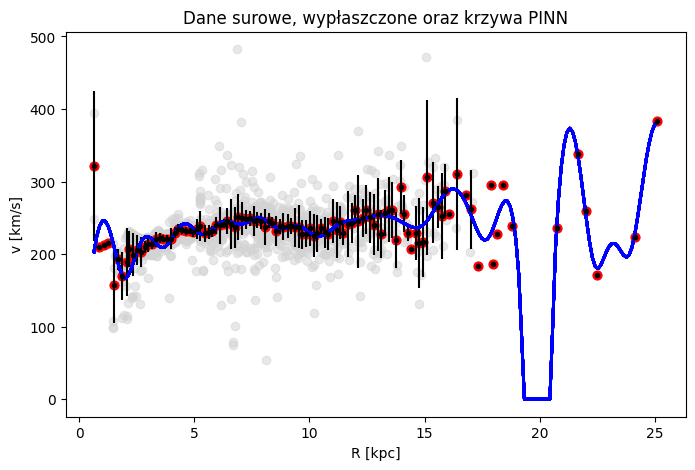

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# 1. Dane surowe
plt.scatter(R_raw, v_obs_raw, color='lightgray', alpha=0.5, label='Dane surowe')

# 2. Wypłaszczone dane z błędami
plt.errorbar(R_mean, v_mean, yerr=v_std, fmt='o', color='black', markersize=3,
             label='Średnie w binach ± σ')

# 3. Wypłaszczone dane (bez błędów) – czerwone
plt.scatter(R_mean, v_mean, color='red', s=40, label='Wypłaszczone dane')

# 4. Predykcja PINN
plt.plot(R_test_phys.detach().numpy(),
         v_test_phys.detach().numpy(),
         color='blue', linewidth=2,
         label='PINN - v(R)')

plt.xlabel('R [kpc]')
plt.ylabel('v [km/s]')
plt.title('Dane surowe, wypłaszczone oraz krzywa PINN')
plt.show()


In [ ]:
import os
print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
import torch
print(torch.__version__)
x = torch.tensor([1.0, 2.0])
print(x)

AttributeError: partially initialized module 'torch' has no attribute 'fx' (most likely due to a circular import)